In [1]:
%matplotlib inline

In [2]:
# initialization
from rayoptics.environment import *

# Create a new model

In [3]:
opm = OpticalModel()
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']
print(f"{opm.ro_version=}")

opm.ro_version='0.9.5.post1.dev3+gfa56c0e.d20241222'


## Define first order aperture and field for system

In [4]:
osp.pupil = PupilSpec(osp, key=['object', 'epd'], value=40.0)
osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0., 20.0])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)

## Define interface and gap data for the sequential model

In [5]:
opm.radius_mode = True

sm.gaps[0].thi=200.0

sm.add_surface([50.0, 15.0, 1.500, 62.5])
sm.add_surface([-50.0, 65.517241])

## Update the model

In [6]:
opm.update_model()

In [7]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000      200.000       air             1      20.000
    1:    50.000000      15.0000   500.625             1      20.917
    2:   -50.000000      65.5172       air             1      20.748
  Img:     0.000000      0.00000                       1      16.495


In [8]:
listobj(osp)

aperture: object epd; value=   40.0000
field: object height; value=   20.0000
y =  0.000 ( 0.00) vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
y = 20.000 ( 1.00) vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
is_relative=False, is_wide_angle=False
central wavelength=  587.5618 nm
wavelength (weight) =  486.1327 (0.500),  587.5618 (1.000)*,  656.2725 (0.500)
focus shift=0.0



## Build the paraxial model and list

In [9]:
pm.first_order_data()

efl               52.63
f                 52.63
f'                52.63
ffl              -47.37
pp1               5.263
bfl               47.37
ppk              -5.263
pp sep            4.474
f/#               1.724
m               -0.3448
red                -2.9
obj_dist            200
obj_ang          -5.711
enp_dist              0
enp_radius           20
na obj              0.1
n obj                 1
img_dist          65.52
img_ht           -6.897
exp_dist         -11.11
exp_radius        22.22
na img            -0.29
n img                 1
optical invariant           -2


In [10]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0           20          0.1         -0.1             0          200      1.00000    dummy
 1:           20            0         -0.1         -0.1          0.01           10      1.50000    transmit
 2:           19           -1        -0.29        -0.09          0.01      65.5172      1.00000    transmit
 3:      1.1e-07     -6.89655        -0.29        -0.09             0            0      1.00000    dummy


In [11]:
osp.list_parax_trace()

stop surface: None
           y           u           n*i         ybar         ubar        n*ibar
 0            0          0.1          0.1           20         -0.1         -0.1
 1           20   -0.0666667          0.5            0   -0.0666667         -0.1
 2           19        -0.29        -0.67           -1        -0.09        -0.07
 3      1.1e-07        -0.29        -0.29     -6.89655        -0.09        -0.09


In [12]:
to_pkg = compute_third_order(opm)

In [13]:
print("Seidel sums")
print(to_pkg)

Seidel sums
          S-I      S-II     S-III      S-IV       S-V
1    0.722222 -0.144444  0.028889  0.026667 -0.011111
2    2.094368  0.218815  0.022861  0.026667  0.005175
sum  2.816590  0.074370  0.051750  0.053333 -0.005937


### convert aberration sums to transverse measure

In [14]:
ax_ray, pr_ray, fod = ar['parax_data']
n_last = sm.central_rndx(-1)
u_last = ax_ray[-1][mc.slp]
to.seidel_to_transverse_aberration(to_pkg.loc['sum',:], n_last, u_last)

TSA   -4.856190
TCO   -0.384673
TAS   -0.359627
SAS   -0.181178
PTB   -0.091954
DST    0.010235
dtype: float64

### convert sums to wavefront measure

In [15]:
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
to.seidel_to_wavefront(to_pkg.loc['sum',:], central_wv).T

W040    599.211460
W131     63.287054
W222     44.038015
W220     44.711656
W311     -5.051856
dtype: float64

In [16]:
listobj(sm)

0: Obj: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=20.0
t=200.0 (+1);    medium: air

1: transmit
profile: Spherical
c=0.02,   r=50.0
surface_od=20.917104566119892
t=15.0 (+1);    medium: 500.625, user

2: transmit
profile: Spherical
c=-0.02,   r=-50.0
surface_od=20.74836209234251
t=65.517241 (+1);    medium: air

3: Img: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=16.494559879622017

do apertures: True


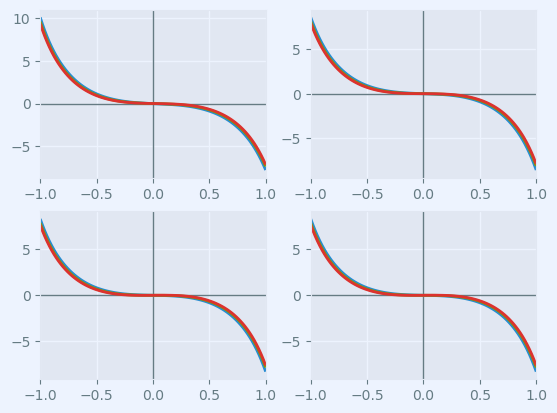

In [17]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray').plot()

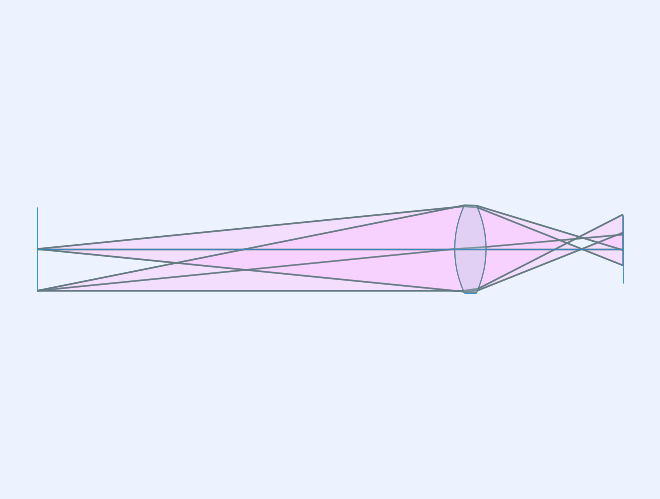

In [18]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, do_draw_rays=True, do_paraxial_layout=False, opt_model=opm).plot()

In [19]:
print(layout_plt.ele_bbox)
print(layout_plt.ray_bbox)
print(layout_plt.sys_bbox)

[[-200.          -20.91710457]
 [  80.517241     20.91710457]]
[[-200.          -20.43673372]
 [  80.517241     20.91710457]]
[[-214.02586205  -34.94296662]
 [  94.54310305   34.94296662]]


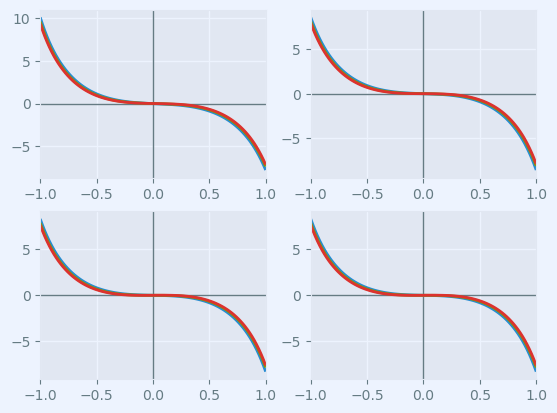

In [20]:
abr_plt.refresh()

In [21]:
sm.ifcs[2].optical_power/(-0.5)

np.float64(-0.02)

# Save and restore model

In [22]:
opm.save_model('Biconvex_Singlet')

In [23]:
notebook_pth = Path().resolve()

In [24]:
opm_res = open_model(notebook_pth/'Biconvex_Singlet.roa')

In [25]:
opm_res['sm'].list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000      200.000       air             1      20.000
    1:    50.000000      15.0000   500.625             1      20.917
    2:   -50.000000      65.5172       air             1      20.748
  Img:     0.000000      0.00000                       1      16.495


In [26]:
listobj(opm_res['osp'])

aperture: object epd; value=   40.0000
field: object height; value=   20.0000
y =  0.000 ( 0.00) vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
y = 20.000 ( 1.00) vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
is_relative=False, is_wide_angle=False
central wavelength=  587.5618 nm
wavelength (weight) =  486.1327 (0.500),  587.5618 (1.000)*,  656.2725 (0.500)
focus shift=0.0



In [27]:
opm_res['pm'].list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0           20          0.1         -0.1             0          200      1.00000    dummy
 1:           20            0         -0.1         -0.1          0.01           10      1.50000    transmit
 2:           19           -1        -0.29        -0.09          0.01      65.5172      1.00000    transmit
 3:      1.1e-07     -6.89655        -0.29        -0.09             0            0      1.00000    dummy


In [28]:
opm_res['pt'].list_model()

root
├── Object
├── E1
└── Image


In [29]:
opm_res['em'].list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: E1 (Element): Element: Spherical(c=0.02), Spherical(c=-0.02), t=15.0000, sd=20.9171, glass: 500.625
2: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


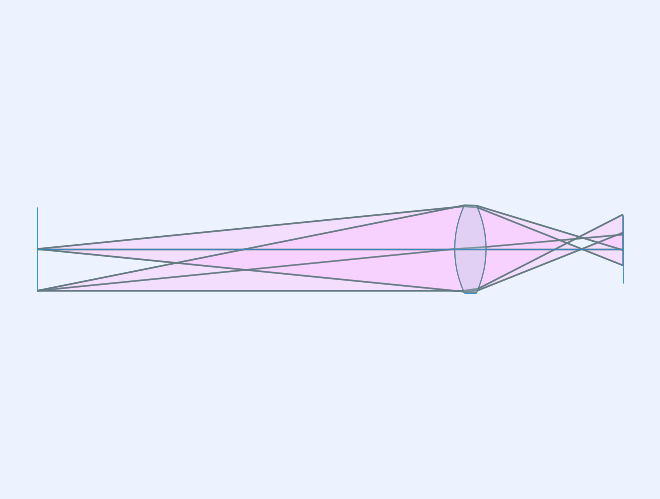

In [30]:
layout_plt_res = plt.figure(FigureClass=InteractiveLayout, do_draw_rays=True, do_paraxial_layout=False, opt_model=opm_res).plot()